<a href="https://colab.research.google.com/github/educhel/L03_Data_Analysis/blob/main/0115_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 시각화
===

## [1] 실전! 데이터 시각화 실습 (1)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.8 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.shape

(891, 15)

In [ ]:
titanic.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


### (1) 나이(Age)와 요금(Fare)에 따른 생존 패턴을 두 변수의 관계를 중심으로 시각화해 보세요.
(생존 여부는 색상으로 구분합니다)


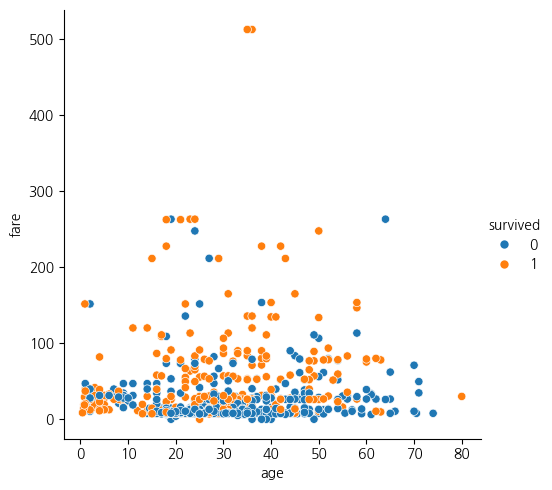

In [ ]:
sns.relplot(data=titanic,kind='scatter',
            x='age',y='fare',
            hue='survived')

### (2) 성별(sex)에 따라 나이(age)–요금(fare) 관계가 생존 여부(survived) 별로 어떻게 달라지는지 살펴보세요.


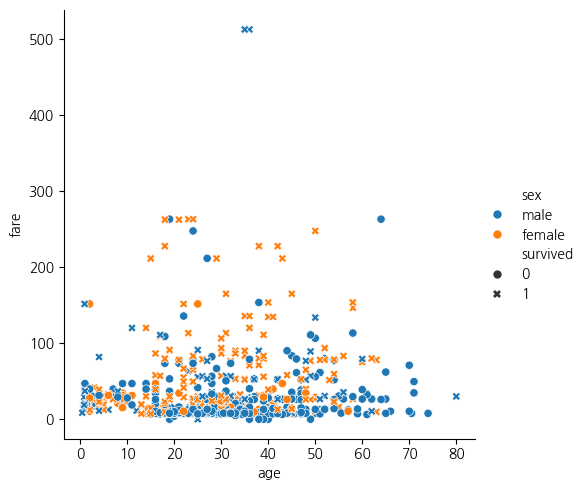

In [ ]:
sns.relplot(data=titanic, x='age',y='fare',
            hue='sex',style='survived')

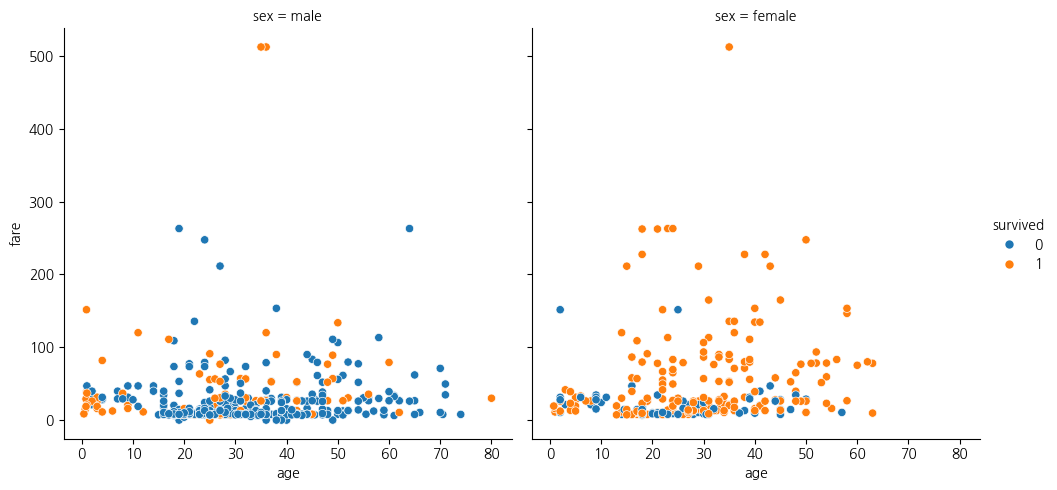

In [ ]:
sns.relplot(data=titanic, x='age',y='fare', col='sex', hue='survived')

### (3) 승선 항구(embarked)와 성별(sex)이라는 두 조건에 따라
나이(age)–요금(fare) 관계가 어떻게 달라지는지
여러 그래프로 나누어 비교해 보세요.


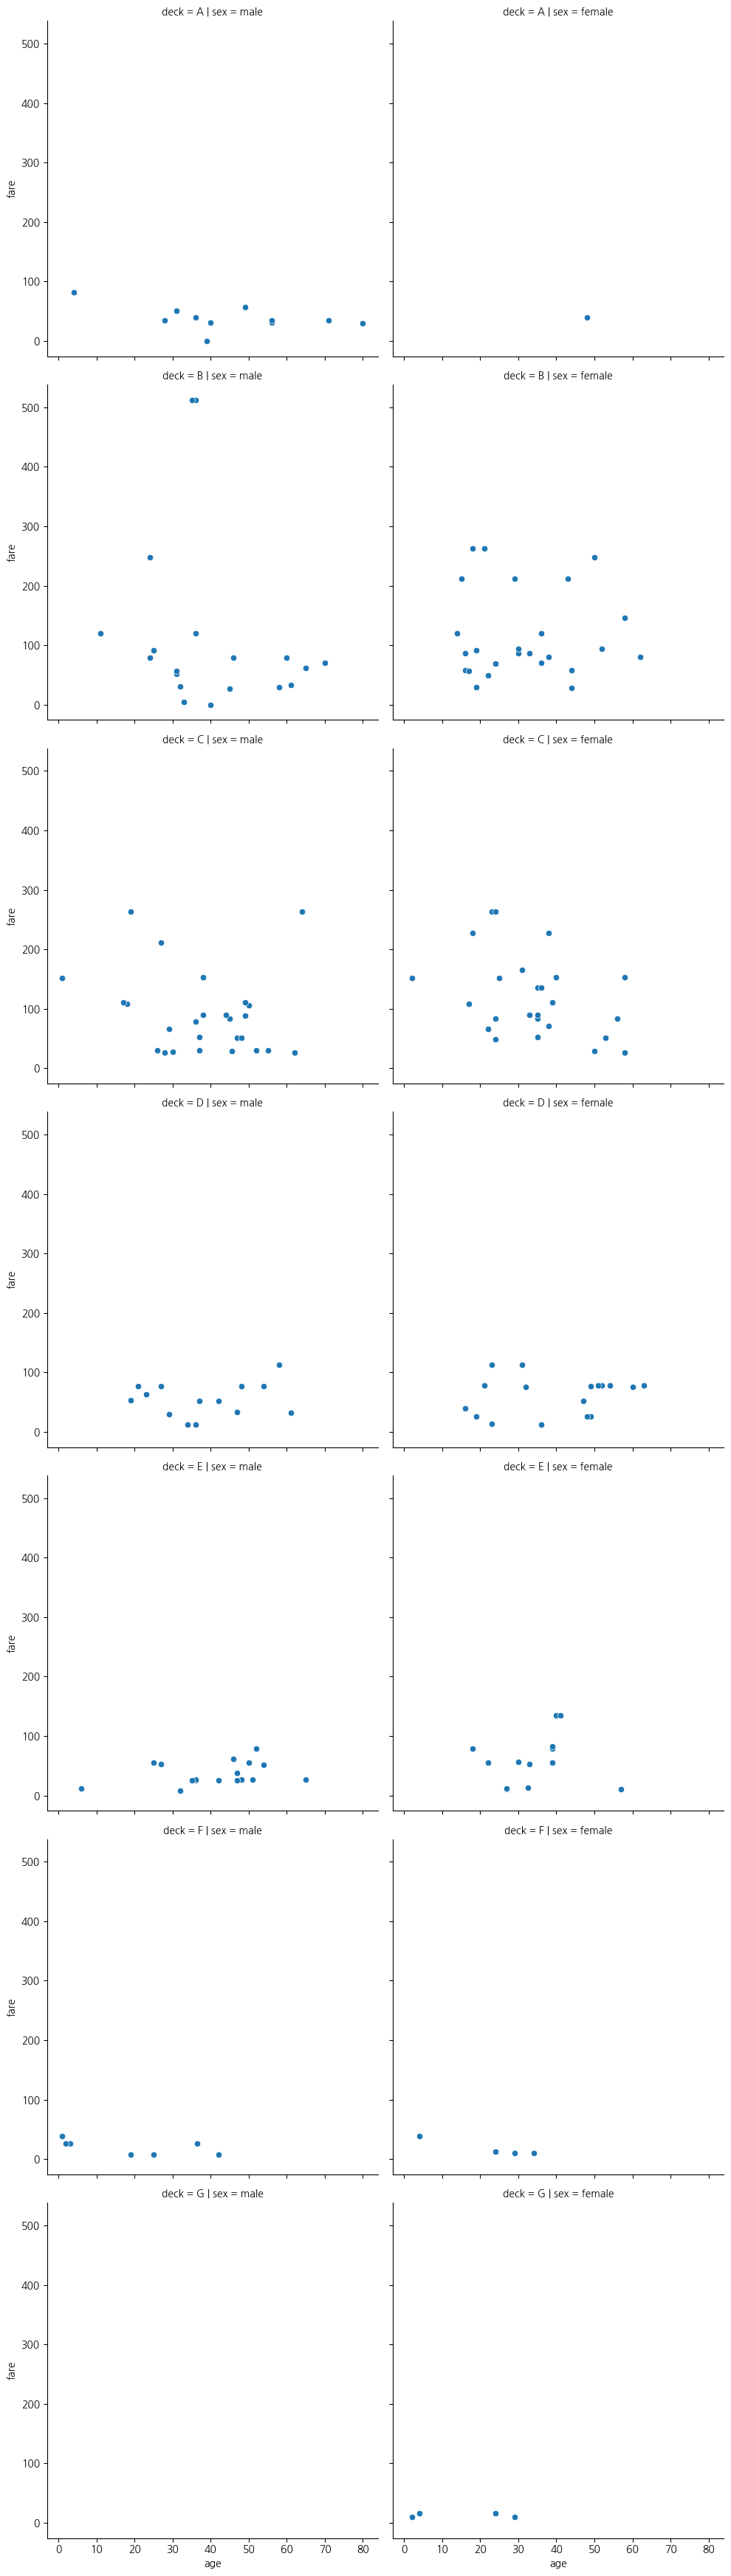

In [ ]:
sns.relplot(data=titanic, x='age',y='fare',
            col='sex', row='deck')

In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


## [2] 실전! 데이터 시각화 실습 (2)

### (1) 요금의 분포를 시각화해 보세요.

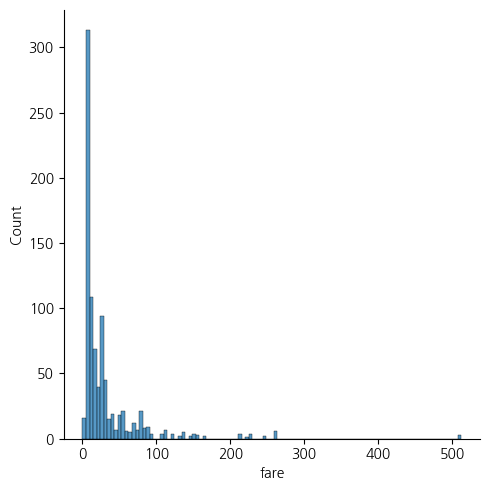

In [ ]:
sns.displot(data=titanic, x='fare')

In [ ]:
titanic.drop(titanic[titanic['fare'] > 500].index,inplace=True)

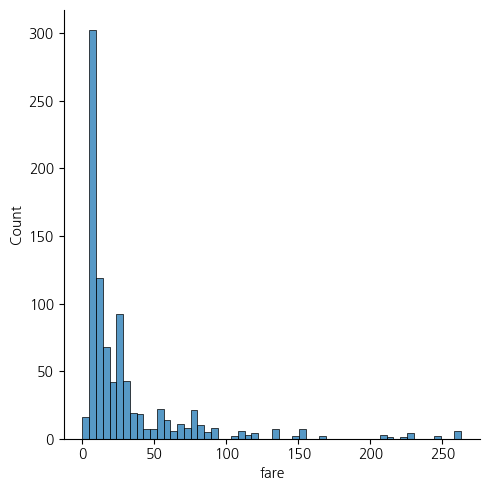

In [ ]:
sns.displot(data=titanic, x='fare')

### (2) KDE을 시각화하여, 생존자와 비생존자의 연령 분포를 비교해 보세요.

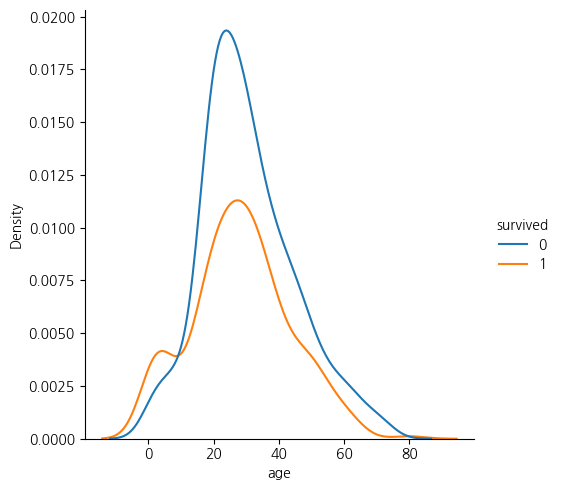

In [ ]:
sns.displot(data=titanic, kind='kde',
            x='age',hue='survived')

### (3) age 열에 대한 rugplot을 추가하여 개별 데이터 포인트의 분포를 확인합니다. KDE plot과 함께 표시합니다.

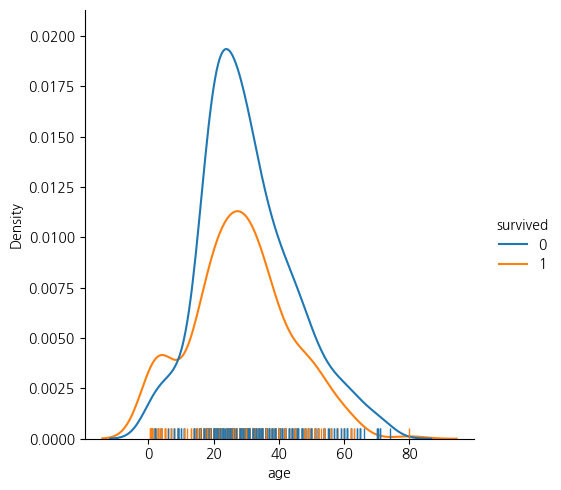

In [ ]:
sns.displot(data=titanic, x='age',
            kind='kde',
            hue='survived',
            rug=True)

## [3] 실전! 데이터 시각화 실습 (3)

### (1) 승선 클래스(class)별로 survived의 평균값을 이용해 생존율을 막대그래프로 비교해 보세요.

<Axes: xlabel='class', ylabel='survived'>

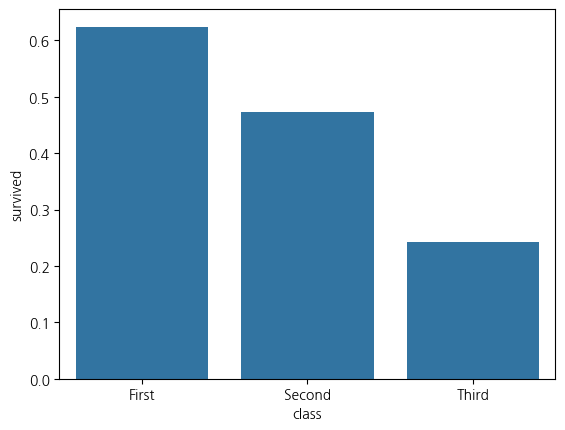

In [ ]:
# 범주형
# x="class"
# y="survived" -> 수치형

sns.barplot(data=titanic, x='class',y='survived',
            errorbar=None)

<Axes: xlabel='class', ylabel='count'>

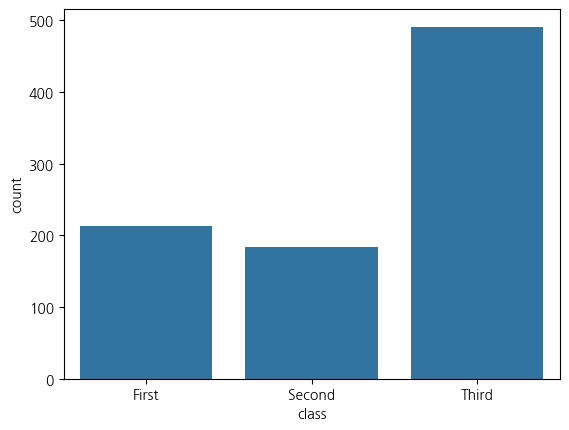

In [ ]:
# x="class" -> 범주의 갯수 세기
sns.countplot(data=titanic, x='class')

### (2) violinplot을 활용하여, 승선 항구(embarked)별 요금(fare)을 시각화하고, 생존(survived) 의 정보도 담을 수 있도록 파라미터를 조절해 보세요.


<Axes: xlabel='embarked', ylabel='fare'>

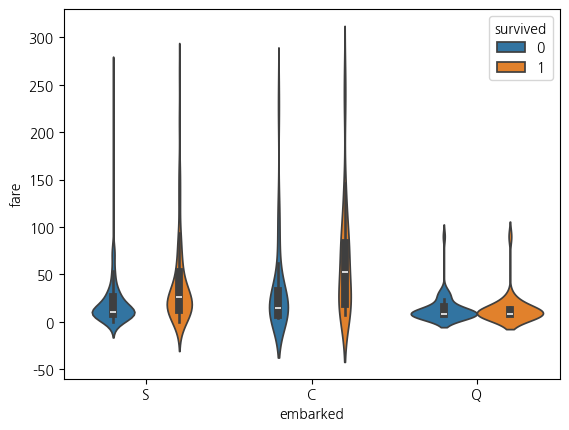

In [ ]:
# 범주형
# x = 'embarked' -> 범주
# y = 'fare' -> 수치형

sns.violinplot(data=titanic, x='embarked',y='fare',
               hue='survived')

## [4] 실전! 데이터 시각화 실습 (4)

In [ ]:
flights = sns.load_dataset('flights')

In [ ]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
flights['month'] = flights['month'].astype(str)